In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings as ws
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
ws.filterwarnings("ignore")

In [5]:
cancer = load_breast_cancer()

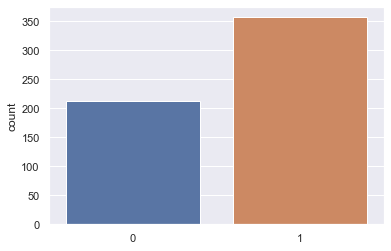

In [8]:
sns.set()
sns.countplot(cancer.target)
plt.show()

In [9]:
# Splitting the data 
X_train, X_test, y_train , y_test = train_test_split (cancer.data, cancer.target, test_size = 0.2 , random_state = 42, stratify = cancer.target)

In [10]:
# instianciating the several Classifier
lr = LogisticRegression (random_state = 42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 42)

In [11]:
# list of classifier
classifiers = [lr, knn, dt]

In [29]:
# Fitting the classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred )
    print(clf.__class__.__name__ , "has testing accuracy is", round(acc*100,2))

LogisticRegression has testing accuracy is 95.61
KNeighborsClassifier has testing accuracy is 91.23
DecisionTreeClassifier has testing accuracy is 91.23


In [13]:
# using the VOTing Classifier

from sklearn.ensemble import VotingClassifier

In [22]:
#  Define the list classifiers
temp_class = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]


Vt = VotingClassifier(estimators=temp_class)

In [23]:
Vt.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_...
                             ('Classification Tree',
                              DecisionTr

In [24]:
y_pred = Vt.predict(X_test)

In [26]:
print(round(accuracy_score(y_test, y_pred)*100))

94.0


In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_pred))

[[39  3]
 [ 7 65]]


In [33]:
y_predicat_lr = lr.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_predicat_lr))

[[39  3]
 [ 2 70]]


In [35]:
# The Logistic Regression is quite good 